<a href="https://colab.research.google.com/github/Kathysita/SeReMpy/blob/main/Copia_de_Serempy_Explicado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Kathysita/SeReMpy.git

Cloning into 'SeReMpy'...
remote: Enumerating objects: 429, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 429 (delta 22), reused 4 (delta 1), pack-reused 371 (from 1)
Receiving objects: 100% (429/429), 7.25 MiB | 17.07 MiB/s, done.
Resolving deltas: 100% (259/259), done.


In [2]:
%cd SeReMpy/

/content/SeReMpy


####Gráficos que hay que arreglar
#####ESPetroInversions: F1
#####ESSeisInversion: F1
#####SeismicModelDriver: Tiene una tabla que creo que no va ahi si no que en Rockphysicsmodeldriver.py

# 1.- ESPetroInversionDriver

---

####**¿Qué es?**
#####Este Driver ilustra la implementación del método de inversión petrofísica basado en el ES-MDA para predecir la distribución posterior de las propiedades petrofísicas condicionadas a datos sísmicos. La inversión se aplica a un conjunto de tres sismogramas, incluyendo acumulaciones de ángulo cercano, medio y lejano. Las propiedades del modelo de interés son porosidad, volumen de arcilla y saturación de agua.

####**¿Que es ES-MDA?**
#####Corresponde a un método matematico para adivinar propiedades de un yacimiento (o rocas bajo tierra) usando datos ya medidos y muchas simulaciones. Una forma de visualizar lo que realiza éste metodo es pensar que se reciben 1000 datos de suposiciones de como podría actuar cierto material bajo una condición especifica, y a medida que se realiza cada comparación poco a poco comienzan a corregirse esas suposiciones acercandose mas a un valor real, teniendo al final muchas "correcciones" las cuales ayudarán a dar una predicción y al mismo tiempo otros valores que generan un margén de incertidumbre.

####**¿Para qué se utiliza?**
#####Sirve para estimar las propiedades de las rocas bajo la superficie (porosidad, volumen de arcilla y saturación de agua) a partir de datos sísmicos (3 seismogramas), corrigiendo paso a paso las simulaciones iniciales hasta que coincidan con los datos observados utilizando para esto el método de ES-MDA.

####**Gráficos**
#####Para empezar el concepto de este gráfico es realizar 3 diferentes sismogramas desde diferentes angulos (De cerca, intermedio y de lejos), Donde el eje Y corresponde al tiempo del muestreo y el eje X la amplitud de la traza sismica.
####a) Figura 1
#####La figura 1, corresponde solamente a un gráfico el cual contiene solamente el valor referencial del modelo. este puede ser usado y considerado como una "referencia".
####b) Figura 2
#####La Figura 2 añade entonces, los datos los cuales serviran como suposiciones, en éste caso corresponde a 500 datos que son graficados como lineas azules dispersas llamadas "Prior realizations", y a estos tambien se añade una linea graficada color roja llamada "Prior Mean" la cual es un calculo de la media de lo que se grafica con las lineas azules de las suposiciones. En este caso este gráfico aunque contenga los datos, estos mismos no estan procesados aún bajo el metodo de ES-MDA.
####c) Figura 3
#####La figura 3 realiza, entonces el método de ES-MDA realizando el ajuste de los valores entregados previamente, donde se puede notar como los datos en azul ahora llamados "Posterior Realizations" comienzan a ajustarse a el valor referencial que ofrece "Reference Model" y como tambien gracias a esto, la linea graficada en color rojo tambien se ajusta según el nuevo valor de media que resulta luego de realizar el ajuste.

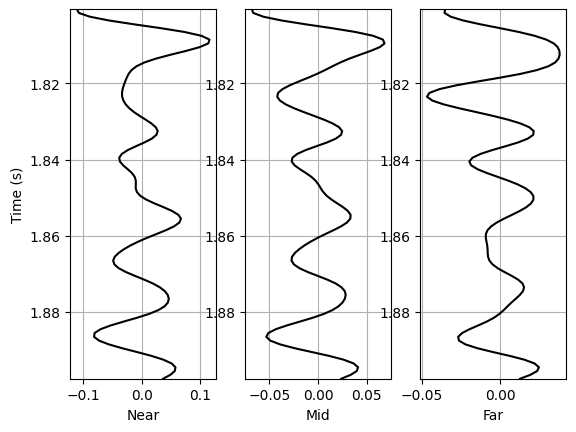

/content/SeReMpy/Examples/ESPetroInversionDriver.py:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trow = np.matlib.repmat(np.arange(0, nm * dt, dt), nm, 1)


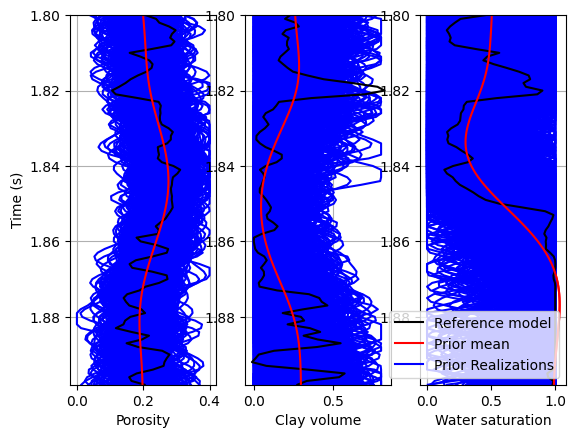

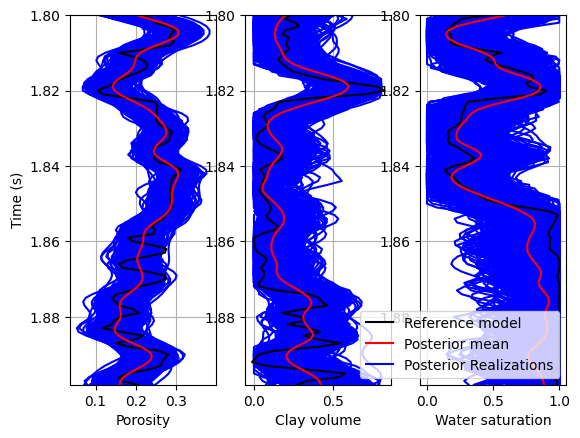

<Figure size 640x480 with 0 Axes>

In [3]:
%run /content/SeReMpy/Examples/ESPetroInversionDriver.py

# **2.- ESSeisInversionDriver**
---

####**¿Qué es?**
#####Este Driver es similar al anterior, pero enfocado en las propiedades elasticas de el material estudiado, buscando predecir como actuan las rocas según las ondas que reciban, y aplicandosele a esto el método ES-MDA. Estos datos se obtienen a partir de información como: Vp (Velocidad de onda P), Vs (Velocidad de onda S) y Rho (Densidad) y el tiempo.
####**¿Para qué sirve?**
#####Éste Driver ayuda a predecir como una señal sismica medida en una superficie se procesa en el subsuelo en cuanto a la velocidad y la densidad según el material del que se trate.
####**Vs, Vp y Rho**
#####Corresponden a propiedades elásticas de las rocas, como tal indican como las ondas sísmicas las procesan y que tan densas son las rocas.
#####a) Vs (Velocidad de onda S, Secundaria o de Cizalla): Corresponde a la velocidad de la onda la cual mueve el material perpendicularmente a su propagación, en un sismómetro, llegan despues de la onda Vp y solo puede moverse por sólidos, no liquidos.
#####b) Vp (Velocidad de onda P, Primaria o compresional): Corresponde a la velocidad a la que viajan las ondas que son capaces de complimir y expandir las rocas,  en un sismómetro llegan primero y su valor depende de la densidad y la rigidez del material.
#####c) Rho (Densidad): Corresponde a la cantidad de masa x unidad de volumen de una roca, y mientras mas densas sean, hará que el valor de Vp y Vs sean mayores.
####**Gráficos**
#####En este caso, el gráfico se divide en 3 secciones donde se mide Vp, Vs y Rho (en el eje x) contra el tiempo (Eje y) y la cantidad de suposiciones consideradas en el gráfico son 500.
####a) Figura 1
#####Corresponde al valor real que posee la suposición, dada por una medición con una linea negra.
####b) Figura 2
#####Se agregan en lineas azules las 500 suposiciones las cuales tendrán que procesarse, aunque al aun no ser llevadas al metodo de ES-MDA, éstas se encuentran dispersas y en linea roja, un calculo de media de todas las lineas azules que se encuentran en el gráfico. Éste gráfico sirve como una representación de como se encuentran los datos antes de pasar su procesamiento y ajuste de valores.
####c) Figura 3
#####En éste gráfico se realiza el método de ES-MDA mostrando toda la información previa de la figura 2, ahora mas ajustada al valor referencial y con un márgen de incertidumbre un poco menos pronunciado.


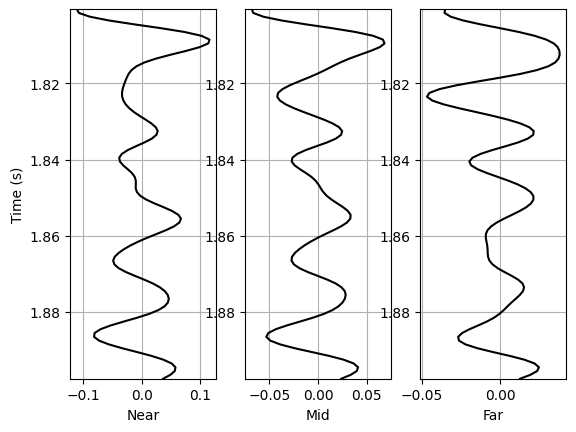

/content/SeReMpy/Examples/ESSeisInversionDriver.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trow = np.matlib.repmat(np.arange(0, nm * dt, dt), nm, 1)


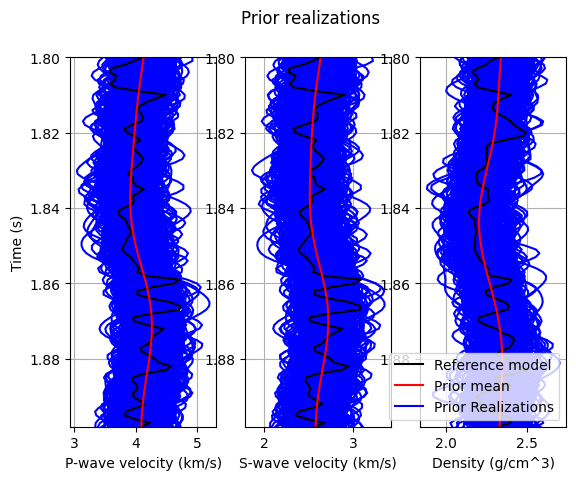

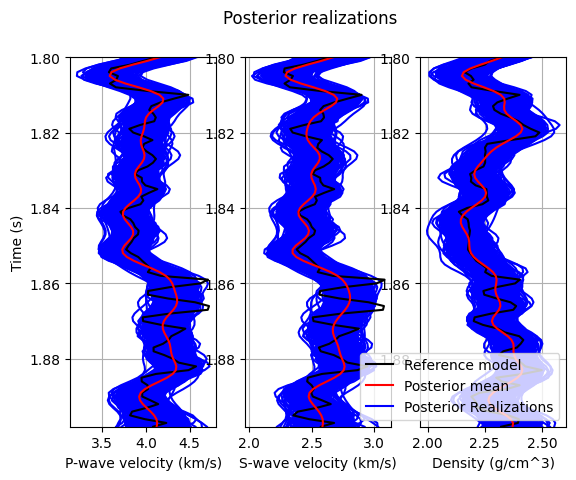

<Figure size 640x480 with 0 Axes>

In [4]:
%run Examples/ESSeisInversionDriver.py

# 3.- FaciesClassificationDriver
---
####¿Qué es?
#####Este Driver es utilizado para identificar las Facies de un material (Una Facie corresponde a un tipo de material que posee diferentes caracteristicas que le corresponden a diferentes materiales) esto se realiza por medio del uso de la Estadistica Bayesiana y los valores de pozo (previamente definidos) que poseen informacion sobre la velocidad de onda P (vP) y la densidad (Rho).
#####En pocas palabras sirve para entregar un dato que podría ser tomado como la probabilidad de que un material sea de un tipo considerando las caracteristicas del mismo, Uno puede ser mas poroso, o mas compacto que el otro, o variar entre densidades, etc. En este caso, el Driver posee dos versiones realizadas con dos métodos diferentes, Uno aplicando distribucion Gaussiana donde los datos se asumen con la forma de una "campana" y el metodo de Kernel Density, el cual toma datos reales sin asumir la forma de campana, siendo este método mas flexible pero tambien mucho mas lento.
####Gráficos
####Figura 1 (Grafico con circunferencia)
##### Éste grafico es usado utilizando el metodo de distribución Gaussiana, El cual empieza tomando las mediciones de Vp y Densidad y compara esos valores con las los materiales a los que se le quiere asimilar, (y cada uno de estos materiales posee un conjunto de valores que sirven para luego realizar las mediciones organizada. Luego se calcula que tan bien encajan los valores entre el conjunto de datos de la medicion.
#####Para entender este tipo de diagrama, se debe considerar que ambas circunferencias (similares a un sistema de planetas) corresponden a dos tipos diferentes de materiales, y los puntos mientras mas al centro esten, es que estan mas cerca de corresponder a este material, mientras que si se encontrasen mas lejos de las orbitas, se da a entender que tienen mucha menor relacion al material con el que se le esta comparando. Para realizar este calculo se utiliza el teorema de Bayes, el cual combina el concepto de la probabilidad en que un punto encaje con los facies y la probabilidad anterior de que se haya tratado de otro material.
####Figura 2 (Gráfico con circunferencia mas "abstracta")
#####Éste gráfico utiliza como metodo de Kernel Density, el cual corresponde a un método que mide directamente los datos reales sin asumir ninguna forma matematica antes (Como lo hace el metodo anterior) Lo que resulta en un gráfico que en vez de figuras circulares, genera orbitas un poco mas deformadas.
#####Este proceso funciona tomando todos los datos de entrenamiento que poseen las mediciones de Velocidad de Onda P y densidad, de las cuales ya se conoce a que materiales pertenecen. Y luego se estiman las distribuciones reales con los datos para obtener funciones a las que luego se les aplica el Teorema de Bayes. Se podria decir que ambos metodos entregan resultados similares.


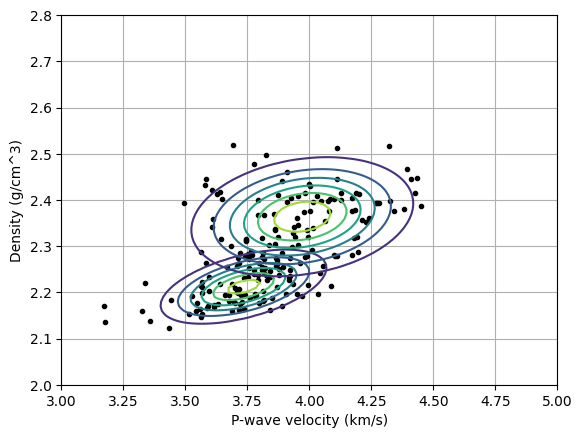

TypeError: Dimensions of C (201, 1) should be one smaller than X(2) and Y(201) while using shading='flat' see help(pcolor)

In [5]:
%run Examples/FaciesClassificationDriver.py

# 4.- GeostatisticsContinuous
---
#####¿Qué es?
######Este Driver explica como usando la Geostadistica, se logran hacer estimaciones de datos geologicos y geofisicos, como por ejemplo valores de velocidad, densidad, elevacion de terrenos, etc. Para ello se utilizan dos tecnicas, una es la de Simple Kriging (SK) la cual toma por asumido que la media ya se conoce y usa las distancias y la correlacion para estimar el valor que pueda ser mas probable. La otra técnica corresponde al Ordinary Kriging (OK) el cual no asume la media y la calcula a partir de los datos. Ambas técnicas entregan un valor estimado para un punto que realmente no ha sido medido.

#####Gráficos
####Figura 1
#####Esta figura presenta de ejemplo 4 mediciones diferentes, las cuales enseñan como funciona la interpolacion y que tan incierto es el resultado de la misma.

####Figura 2
#####ésta Funcion genera mapas completos de un area geografica, enseñando los puntos donde si se tienen datos, y tambien en ocasiones el terreno completo si esque este esta disponible. Sirve para indicar Donde se encuentran los datos y como los mismos se distribuyen (y donde mientras mas separados esten los puntos, su interpolacion sera mas incierta), Enseña otro mapa el cual es un mapa de interpolado suave, que calcula suponiendo una media global, la cual se ve como un mapa de colores donde cada color posee un valor, el cual puede ser elevacion o densidad.
#####El siguiente es el mapa de Ordinary Kriging el cual esta ajustado localmente a las mediciones y se ve mas realista que el mapa realizado con SK, aqui se observa como varian los valores respetando mas los datos locales, por lo que es mas confiable.
#####Finalmente se encuentra el mapa de Simulacion Gaussiana Secuencial (SGS), Este mismo posee 3 o mas mapas (realizaciones) de la misma zona, cada uno respeta estos datos pero añade variaciones aleatorias naturales. estos mapas generan una incertidumbre espacial ya que si la zona posee demasiados datos las simulaciones comienzan a parecerse mucho entre si mismas, pero si las zonas no poseen datos, comienzan a variar demasiado y a generar demasiada incertidumbre  




/content/SeReMpy/Examples/GeostatisticsContinuousDriver.py:42: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(dcoords[:,0], dcoords[:,1], 100, dvalues, 'o')


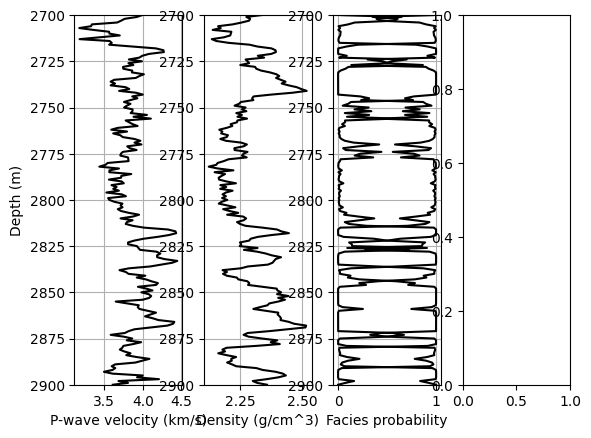

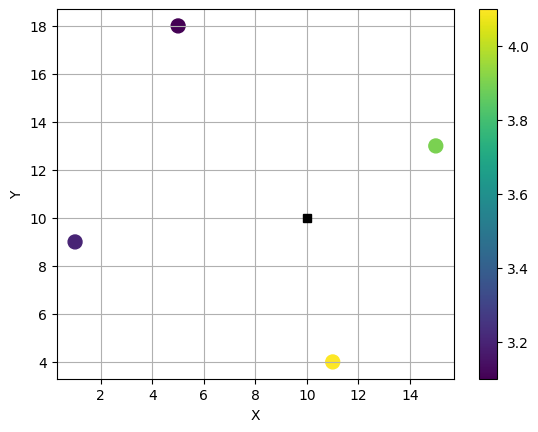

/content/SeReMpy/Examples/GeostatisticsContinuousDriver.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gsim[i,0] = GaussianSimulation(xcoords, dcoords, dvalues, xmean, xvar, l, krigtype, krig)


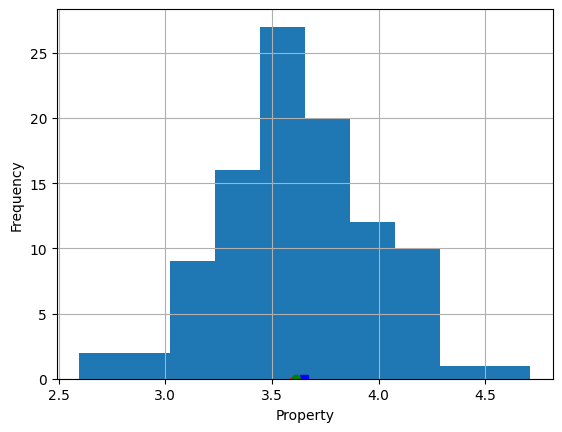

/content/SeReMpy/Examples/GeostatisticsContinuousDriver.py:106: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(dcoords[:,0], dcoords[:,1], 50, dz, 'o')


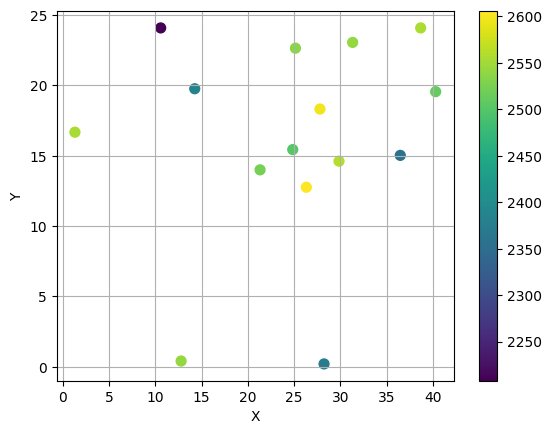

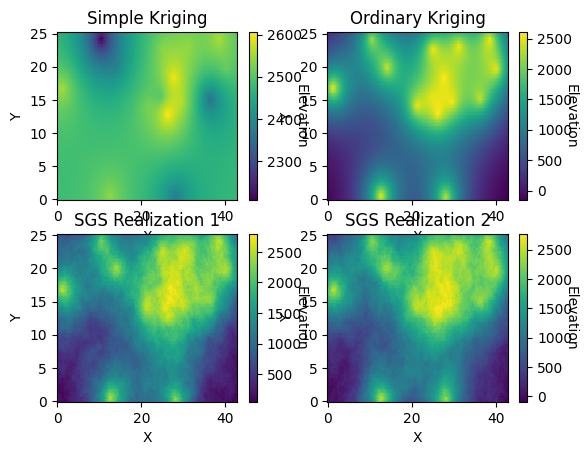

<Figure size 640x480 with 0 Axes>

In [6]:
%run Examples/GeostatisticsContinuousDriver.py

/content/SeReMpy/Examples/GeostatisticsDiscreteDriver.py:41: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(dcoords[:,0], dcoords[:,1], 100, fvalues, 'o')


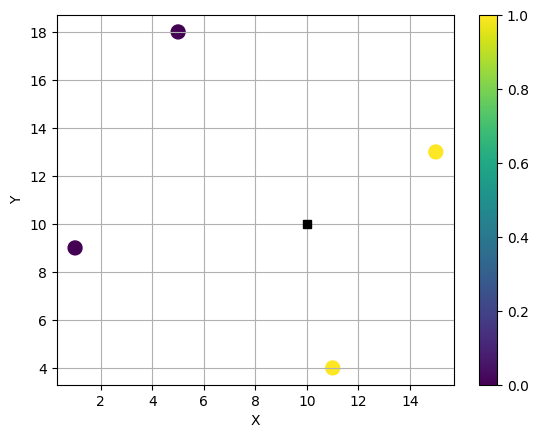

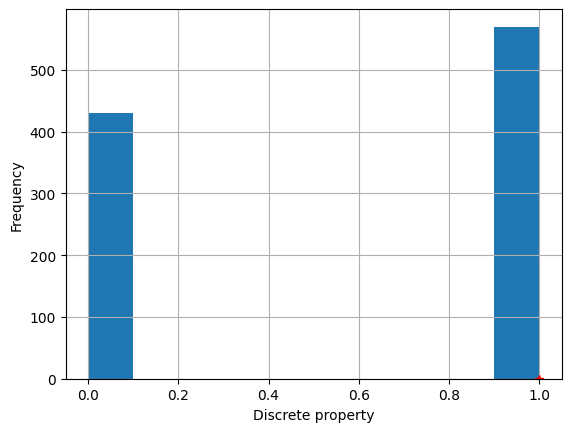

/content/SeReMpy/Examples/GeostatisticsDiscreteDriver.py:104: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(dcoords[:,0], dcoords[:,1], 50, df, 'o')


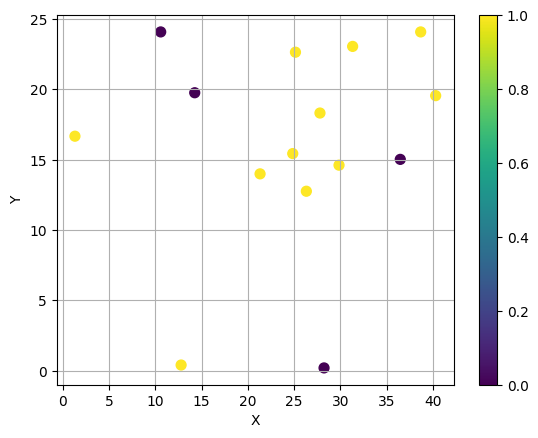

/content/SeReMpy/Examples/GeostatisticsDiscreteDriver.py:115: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ikp[i,:],ikmap[i,0] = IndicatorKriging(xcoords[i,:], dcoords, df, nf, pprior, l, krigtype)


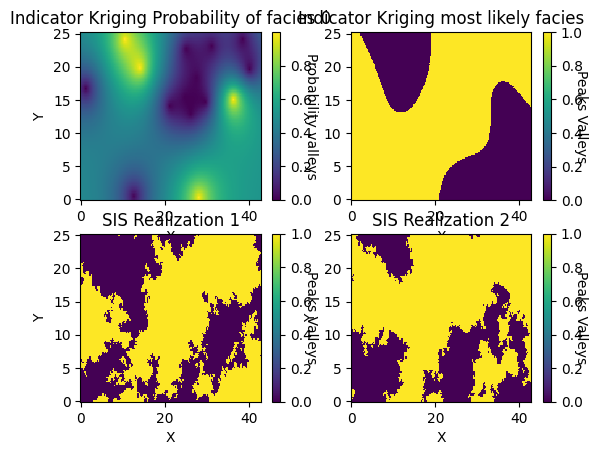

TypeError: Dimensions of C (100, 3) should be one smaller than X(4) and Y(100) while using shading='flat' see help(pcolor)

In [7]:
%run Examples/GeostatisticsDiscreteDriver.py

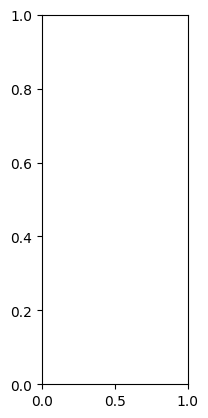

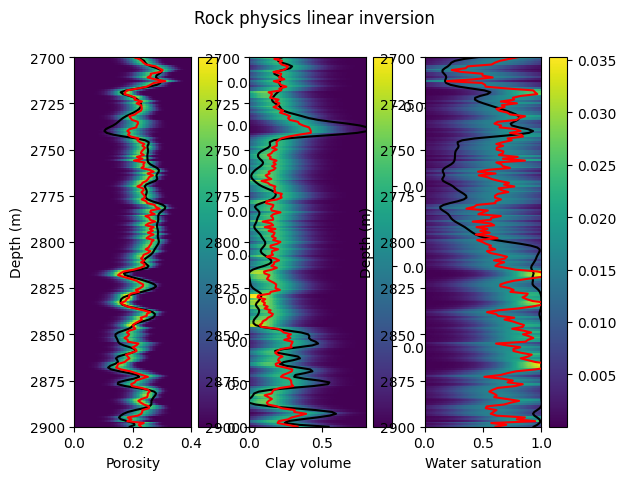

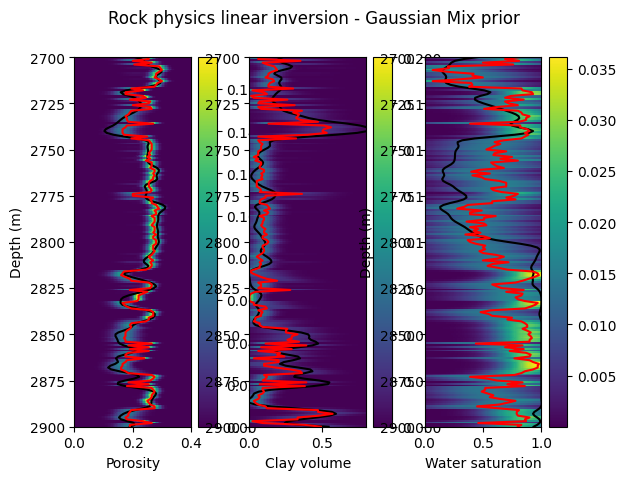

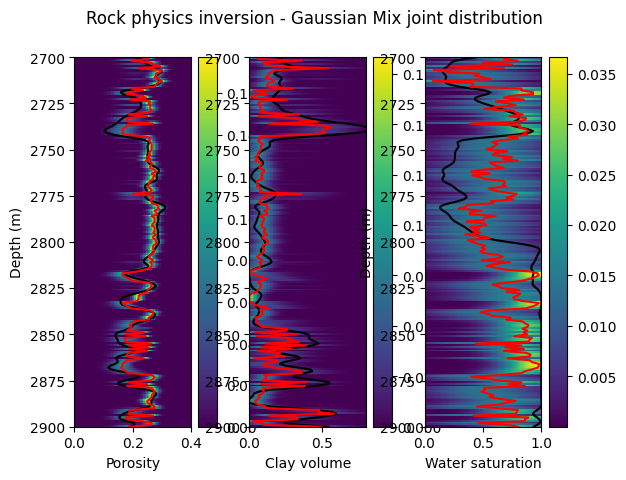

<Figure size 640x480 with 0 Axes>

In [8]:
%run Examples/RockPhysicsInversionDriver.py

# 7.- RockPhysicsModel
---
#### ¿Qué es?
#####Esta función lo que busca es lograr precedir las propiedades elasticas de una roca a partir de la porosidad de esta misma, algo asi como decir, "Si tengo una roca con cierto porcentaje de huecos llenos de agua dentro deesta, ¿qué tan rapido viajará una onda sismica a travez de la roca y que densidad tendrá?" Se utilizan varios metodos para realizar esta función, los cuales corresponden a:
####a) Modelo Empírico (Wyllie y Raymer):
####b) Modelo de medios granulares (Soft y Stiff Sand):
####c) Modelo de inclusiones (poros esféricos o elípticos):
#### Gráficos

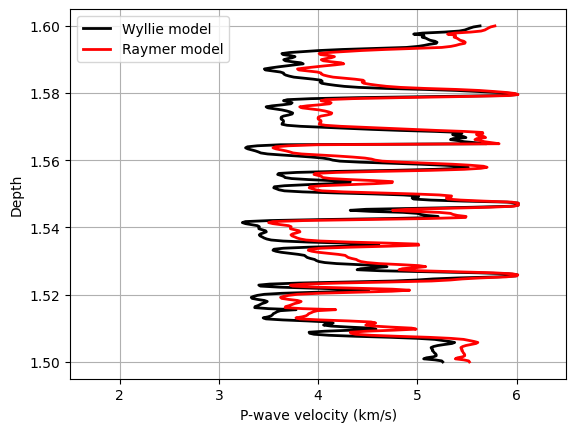

/content/SeReMpy/Examples/RockPhysicsModelDriver.py:72: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(Phi, VpW, 50, Phi, 'o')
/content/SeReMpy/Examples/RockPhysicsModelDriver.py:73: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(Phi, VpR, 50, Phi, 'd')


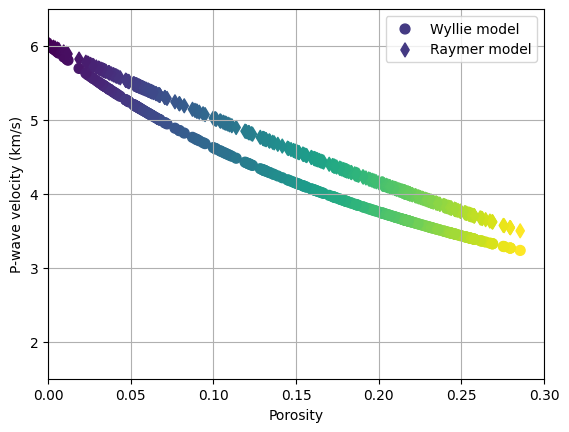

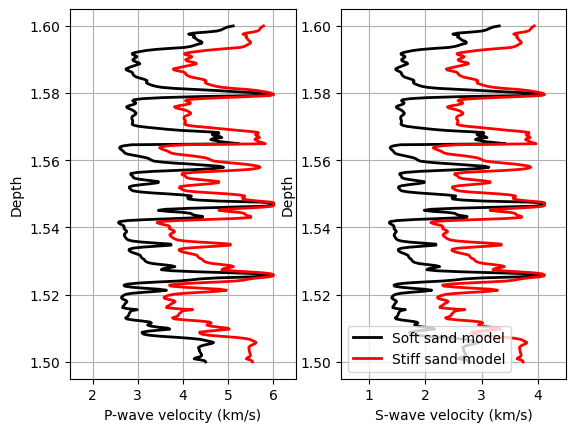

/content/SeReMpy/Examples/RockPhysicsModelDriver.py:115: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(Phi, VpSoft, 50, Phi, 'o')
/content/SeReMpy/Examples/RockPhysicsModelDriver.py:116: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(Phi, VpStiff, 50, Phi, 'd')


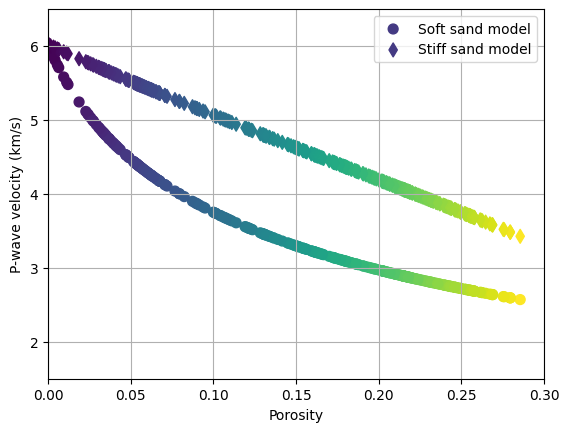

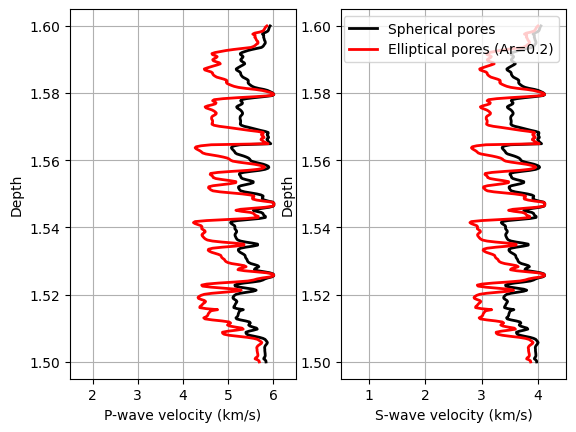

/content/SeReMpy/Examples/RockPhysicsModelDriver.py:157: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(Phi, VpSph, 50, Phi, 'o')
/content/SeReMpy/Examples/RockPhysicsModelDriver.py:158: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(Phi, VpEll, 50, Phi, 'd')


In [9]:
%run Examples/RockPhysicsModelDriver.py

# 8.- SeismicInversion
---
#### ¿Qué es?
#####Es una función que hace una inversión sísmica bayesiana usando la aproximación linealizada de AVO (creada por Aki-Richards).En otras palabras, a partir de los sismogramas sintéticos/medidos (las tablas de Near, Mid, Far), estima la distribución posterior de propiedades elásticas del subsuelo.
#####Esta función en vez de dar un único valor, devuelve el MAP (maximum a posteriori) el cual corresponde a la mejor estimación y el intervalo de confianza 95% (mlp, mup) el cual corresponde a un rango de incertidumbre.
#####Por lo que esta función en general sirve para traducir la sísmica en propiedades físicas de la roca, con un marco estadístico bayesiano que te dice qué tan confiables son esas estimaciones.

#### ¿Qué es una Inversión sísmica Bayesiana?
#####Este concepto corresponde a una mezcla de dos terminos, primero; Inversion sismica, la cual corresponde a las ondas reflejadas (sismogramas) los cuales contienen datos sobre propiedades de un material, como su porosidad, densidad, Velocidad de onda P, Velocidad de onda S, etc.
#####Mientras que el siguiente concepto Bayesiano, la cual viene de la estadistica de Bayes, la cual propone que si ya se tienen una idea previa de como es el material (este llamado Prior) y además luego miras otros datos como los de "near, mid, far" puedes combinar ambos datos aplicando la regla de Bayes y obtener el "posterior" el cual corresponde a "la mejor estimación del material, dada las observaciones que se tenian y lo que ya se sabía desde antes.

#### Gráficos
####a) Figura 1
#####El primer gráfico posee 3 trazas sismicas medidas desde tres angulos diferentes (lejos, intermedio y cerca) y sirve para observar y ver como varia la amplitud de la señal sismica con respecto al tiempo. (Sirve para observar como se aplicará luego la "Inversion Sísmica Bayesiana.
####b) Figura 2
#####En la segunda imagen se muestra el resultado luego de aplicar la inversion Bayesiana en el grafico
#####Cada gráfico tiene varias curvas donde la curva negra corresponde a la "respuesta real" es decir el dato de referencia al realizar la medición, la curva azul corresponde a lo que "se creia" o un modelo previo o Prior, es decir, algo que se asumio basandose en información obtenida previamente.
#####La linea roja es lo que se obtiene o el modelo "posterior", y corresponde a la prediccion final despues de aplicar la INversion Bayesiana. Y finalmente las curvas rojas punteadas corresponden a un intervalo de confianza o la incertidumbre (osea, el rango en el que probablemente se encuentren los valores reales).

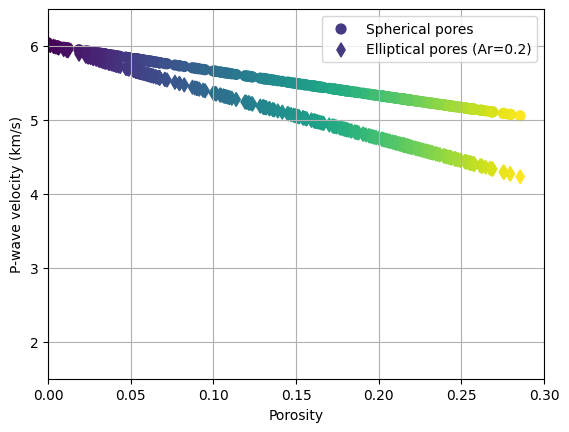

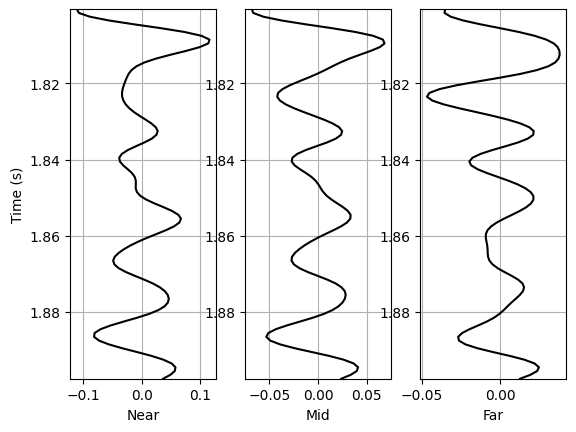

/content/SeReMpy/Examples/SeismicInversionDriver.py:88: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trow = np.matlib.tile(np.arange(0, nm * dt, dt), (nm, 1))


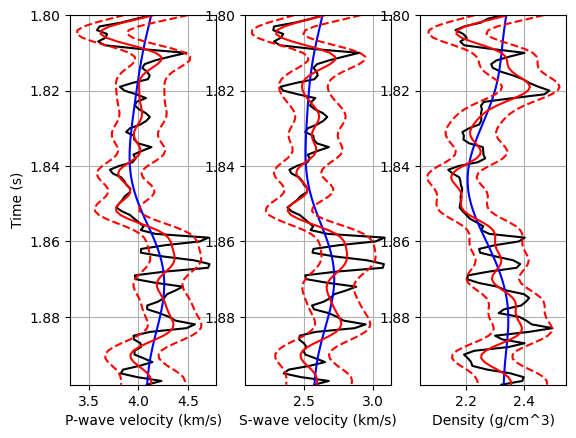

<Figure size 640x480 with 0 Axes>

In [10]:
%run Examples/SeismicInversionDriver.py

# 9.- SeismicModelDriver
---
#### ¿Qué es?
#####Según el libro de "Seismic Reservoir Modeling", este driver corresponde a una *función que calcula datos sísmicos sintéticos según un modelo sísmico linealizado basado en la convolución de una wavelet y la aproximación linealizada de las ecuaciones de Zoeppritz.* En otras palabras, sirve para realizar una simulación de datos sismicos teniendo en consideración ciertas propiedades como la velocidad de onda P y S y la densidad, y a partir de esto combina una Wavelet junto con ecuaciones de Zoeppritz para obtener un sismograma que simula como rebotan las ondas sismicas en las capas.

#### ¿Qué es un Wavelet y la Ecuación de Zoeppritz?
#####Wavelet: Un wavelet corresponde a una onda corta que se utiliza como un tipo de "golpe inicial" al momento de generar el sismograma. Un ejemplo sería el golpe de una campana, donde el primer golpe corresponde al "wavelet" y el eco que suena después serián los movimientos que se ven luego reflejados en las rocas al momento de realizar el sismograma.


#####Ecuacion de Zoeppritz: Corresponde a una ecuación creada el año 1919 por Zoeppritz, y la cual ha ido evolucionando con el tiempo debido a nuevas evoluciones o descubrimientos cientificos, siendo las actualizaciones mas recientes Shuey en 1985 y Aki y Richards en 2002. Esta ecuación corresponde a un conjunto de ecuaciones matemáticas que describen cómo se comportan las ondas sísmicas cuando chocan con una frontera entre dos tipos de roca
#####A continuación la ecuación inicial creada por Zoeppritz:
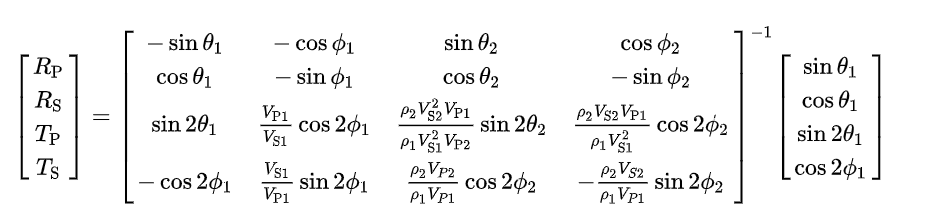
####Ecuación modificada por Richards y Aki:
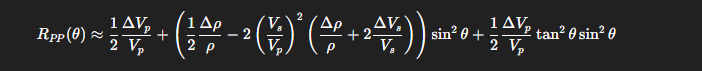

#### ¿Para qué sirve?
#####Como tal su uso es para entregar sismogramas a partir de las propiedades medidas de un material rocoso, Como tal no entrega un dato real y solo sirve para simular y estimar como será el movimiento sismico teniendo en cuenta las propiedades anteriormente entregadas.
#### Gráficos
####a) Figura 1
#####El primer gráfico busca medir las propiedades elásticas en funcion con el tiempo, siendo en la tabla donde se mide la onda P, donde se observa en que lugar la roca es mas compacta (Cuando el Vp es mas alto) y cuando es mas blanda (Vp mas bajo). Ta tabla que mide la onda S, busca dar informacion sobre la rigidez del material (o si el mismo puede contener fluidos), mientras la ultima la cual contiene la densidad, mezclando tanto Vp como Vs, buscan definir la impedancia acustica (dada por Densidad * Vp)
####b) Figura 2
#####Busca Trazar ondas sismicas sinteticas, graficando desde diferentes angulos (Cercano, termino medio y lejanos) y sirve como una forma de demostrar como es que cambia la respuesta sismica sintetica segun el angulo al cual se calcula la misma.

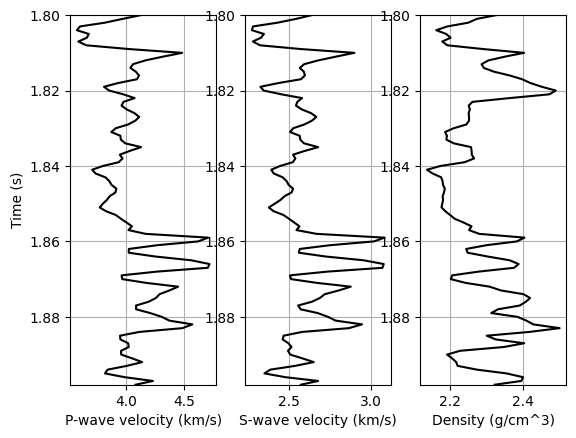

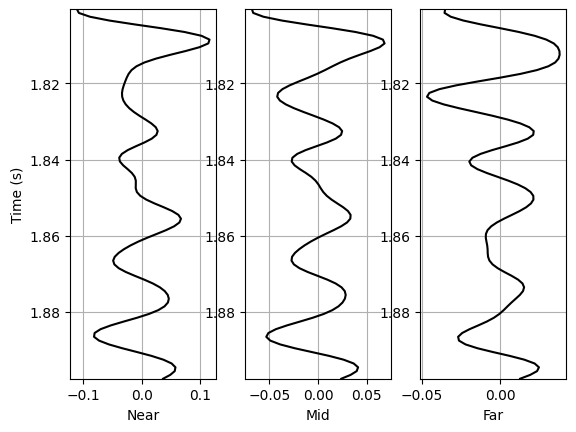

<Figure size 640x480 with 0 Axes>

In [11]:
%run Examples/SeismicModelDriver.py